# Campus Placement Prediction

### Import Labraries Load Dataset

In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
df = pd.read_csv(r'D:\FC practical work\Machine Learning\Data Science project for Campus Placement Prediction\Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### Data Preprocessing

In [69]:
df.shape

(215, 15)

In [70]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [71]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [72]:
df.drop(['sl_no'], axis=1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### Remove Null values  

In [73]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [74]:
df2 = df.copy()


In [75]:
df['salary']= df['salary'].fillna(0)

In [76]:
df2.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Feature Engineering

In [77]:
df2

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [78]:
df2.drop(['sl_no'], axis=1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


#### How Many Students Got Placed?

In [79]:
df2['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [80]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [81]:
df2.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

### Encoding the Categorical Columns

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['ssc_b']=le.fit_transform(df2['ssc_b'])
df2['gender']=le.fit_transform(df2['gender'])
df2['hsc_b']=le.fit_transform(df2['hsc_b'])
df2['hsc_s']=le.fit_transform(df2['hsc_s'])
df2['status']=le.fit_transform(df2['status'])
df2['degree_t']=le.fit_transform(df2['degree_t'])
df2['workex']=le.fit_transform(df2['workex'])
df2['specialisation']=le.fit_transform(df2['specialisation'])

In [83]:
df2

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


### Model Building 

In [84]:
df3 = df2.copy()

In [85]:
df3

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [86]:
df3.drop('salary',axis=1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [87]:
df3.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [88]:
df3

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [89]:
df3.drop('salary',axis=1)
df3

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [90]:
df4=df3.dropna(axis='columns')
df4

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [114]:
df4=df4.drop('sl_no',axis=1)
df4

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [115]:
X = df4.drop('status',axis=1)
y= df4['status']

### Splitting The Dataset Into The Training Set And Test Set

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=30)

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [119]:
X_train

array([[ 0.76980036, -0.37817519,  1.08499548, ..., -0.62875776,
        -0.91092658,  0.01662974],
       [-1.29903811,  0.30685745, -0.92166283, ...,  1.69320516,
        -0.91092658,  1.14597305],
       [ 0.76980036,  1.21110054, -0.92166283, ...,  0.70650677,
         1.09778331,  2.38876637],
       ...,
       [-1.29903811, -1.38288973,  1.08499548, ..., -0.39586279,
         1.09778331, -0.52311729],
       [-1.29903811, -0.35077388, -0.92166283, ...,  0.61334878,
        -0.91092658,  2.09654664],
       [-1.29903811,  1.08322778, -0.92166283, ..., -1.09454772,
         1.09778331, -1.18490903]])

### Model Training

In [120]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)




0.877906976744186

In [121]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)


0.8837209302325582

In [122]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)


1.0

In [123]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)


1.0

In [124]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb.score(X_train,y_train)


1.0

In [126]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

#svm = svm.SVC()
#svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [127]:
y_pred1 = lr.predict(X_test)
#y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

In [128]:
score1=accuracy_score(y_test,y_pred1)
#score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [129]:
print(score1,score2,score3,score4,score5,score6)

0.9069767441860465 0.8604651162790697 0.7906976744186046 0.8604651162790697 0.9302325581395349 0.9302325581395349


In [130]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100]})

In [131]:
final_data

,Models,ACC
0,LR,90.697674
1,SVC,86.046512
2,KNN,79.069767
3,DT,86.046512
4,RF,93.023256
5,GB,93.023256


In [132]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

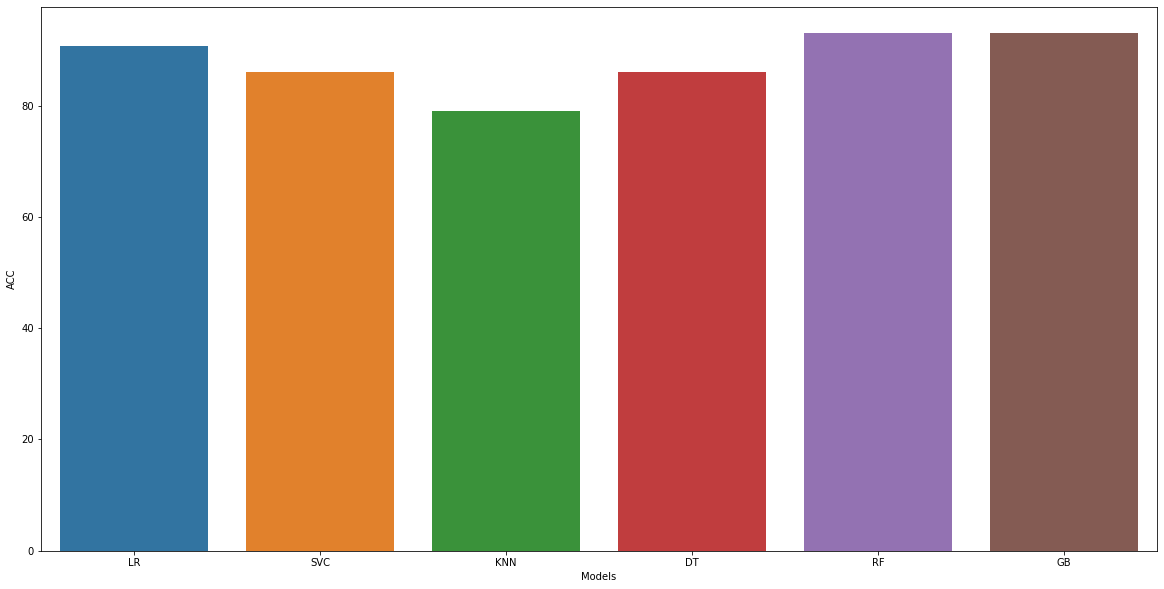

In [133]:
sns.barplot(final_data['Models'],final_data['ACC'])

### Prediction on New Data

In [134]:
new_data = pd.DataFrame({
    'gender':0,
    'ssc_p':67.0,
    'ssc_b':0,
    'hsc_p':91.0,
    'hsc_b':0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'etest_p':55.0,
     'specialisation':1,
    'mba_p':58.8,   
},index=[0])

In [135]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [136]:
p=lr.predict(new_data)
prob=rf.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 0.86


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Save Model Using Joblib

In [137]:
import joblib

In [138]:
joblib.dump(lr,'model_campus_placement')

['model_campus_placement']

In [139]:
model = joblib.load('model_campus_placement')

In [140]:
model.predict(new_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1])

In [146]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
import tkinter.font as font
import pandas as pd

def show_entry_fields():
    text = clicked.get()
    if text == "Male":
        p1=1
        print(p1)
    else:
        p1=0
        print(p1)
    p2=float(e2.get())
    text = clicked1.get()
    if text == "Central":
        p3=1
        print(p3)
    else:
        p3=0
        print(p3)
    p4=float(e4.get())
    text = clicked6.get()
    if text == "Central":
        p5=1
        print(p3)
    else:
        p5=0
        print(p3)
    text = clicked2.get()
    if text == "Science":
        p6=2
        print(p6)
    elif text == "Commerce":
        p6=1
        print(p6)
    else:
        p6=0
        print(p6)
    p7=float(e7.get())
    text = clicked3.get()
    if text == "Sci&Tech":
        p8=2
        print(p8)
    elif text=="Comm&Mgmt":
        p8=1
        print(p8)
    else:
        p8=0
        print(p8)
    text = clicked4.get()
    if text == "Yes":
        p9=1
        print(p3)
    else:
        p9=0
        print(p3)
    p10=float(e10.get())
    text = clicked5.get()
    if text == "Mkt&HR":
        p11=1
        print(p11)
    else:
        p11=0
        print(p11)
    p12=float(e12.get())

    model = joblib.load('model_campus_placement')
    new_data = pd.DataFrame({
    'gender':p1,
    'ssc_p':p2,
    'ssc_b':p3,
    'hsc_p':p4,
    'hsc_b':p5,
    'hsc_s':p6,
    'degree_p':p7,
    'degree_t':p8,
    'workex':p9,
    'etest_p':p10,
     'specialisation':p11,
    'mba_p':p12,   
},index=[0])
    result=model.predict(new_data)
    result1=model.predict_proba(new_data)
    
    if result[0] == 0:
        Label(master, text="Can't Placed").grid(row=31)
    else:
        Label(master, text="Student Will be Placed With Probability of",font=("Arial", 15)).grid(row=31)
        Label(master, text=round(result1[0][1],2)*100,font=("Arial", 15)).grid(row=33)
        Label(master, text="Percent",font=("Arial", 15)).grid(row=34)

master = Tk()
master.title("Campus Placement Prediction System")


label = Label(master, text = "Campus Placement Prediction System"
                          , bg = "green", fg = "white",font=("Arial", 20)) \
                               .grid(row=0,columnspan=2)


Label(master, text="Gender",font=("Arial", 15)).grid(row=1)
Label(master, text="Secondary Education percentage- 10th Grade",font=("Arial", 15)).grid(row=2)
Label(master, text="Board of Education",font=("Arial", 15)).grid(row=3)
Label(master, text="Higher Secondary Education percentage- 12th Grade",font=("Arial", 15)).grid(row=4)
Label(master, text="Board of Education",font=("Arial", 15)).grid(row=5)
Label(master, text="Specialization in Higher Secondary Education",font=("Arial", 15)).grid(row=6)
Label(master, text="Degree Percentage",font=("Arial", 15)).grid(row=7)
Label(master, text="Under Graduation(Degree type)- Field of degree education",font=("Arial", 15)).grid(row=8)
Label(master, text="Work Experience",font=("Arial", 15)).grid(row=9)
Label(master, text="Enter test percentage",font=("Arial", 15)).grid(row=10)
Label(master, text="branch specialization",font=("Arial", 15)).grid(row=11)
Label(master, text="MSc percentage",font=("Arial", 15)).grid(row=12)
clicked = StringVar()
options = ["Male","Female"]

clicked1 = StringVar()
options1 = ["Central","Others"]

clicked2 = StringVar()
options2 = ["Science","Commerce","Arts"]

clicked3 = StringVar()
options3 = ["Sci&Tech","Comm&Mgmt","Others"]

clicked4 = StringVar()
options4 = ["Yes","No"]

clicked5 = StringVar()
options5 = ["Jr.Data Anylyst","ML Engineer"]

clicked6 = StringVar()
options6 = ["Central","Others"]
e1 = OptionMenu(master , clicked , *options )
e1.configure(width=13)
e2 = Entry(master)
e3 = OptionMenu(master , clicked1 , *options1 )
e3.configure(width=13)
e4 = Entry(master)
e5 = OptionMenu(master , clicked6 , *options6)
e5.configure(width=13)
e6 = OptionMenu(master , clicked2 , *options2)
e6.configure(width=13)
e7 = Entry(master)
e8 = OptionMenu(master , clicked3 , *options3)
e8.configure(width=13)
e9 = OptionMenu(master , clicked4 , *options4)
e9.configure(width=13)
e10 = Entry(master)
e11 = OptionMenu(master , clicked5 , *options5)
e11.configure(width=13)
e12 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
buttonFont = font.Font(family='Helvetica', size=16, weight='bold')
Button(master, text='Predict',height= 1, width=8,activebackground='#00ff00',font=buttonFont,bg='black', fg='white',command=show_entry_fields).grid()

mainloop()